# Exercise 10.3 (optional, low pass image filter)

Images files can be loaded and displayed with Matplotlib. An imported image is stored as a 
three-dimensional NumPy array of floats. The shape of the array is `[0:nx, 0:ny, 0:3]`. 
where `nx` is the number of pixels in the $x$-direction, `ny` is the number of pixels in the $y$-direction,
and the third axis is for the colour component (RGB: red, green and blue) intensity. See http://matplotlib.org/users/image_tutorial.html for more background.

Below we fetch an image and display it:

<class 'numpy.ndarray'>
Image array shape: (375, 500, 3)


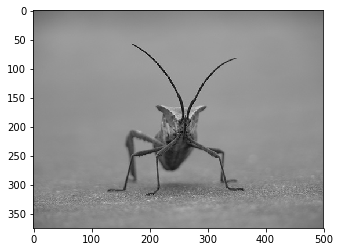

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Import image
img = mpimg.imread('https://raw.githubusercontent.com/matplotlib/matplotlib.github.com/master/_images/stinkbug.png')

# Check type and shape
print(type(img))
print("Image array shape: {}".format(img.shape))

# Display image
plt.imshow(img);

In [2]:
img[0,0]

array([ 0.40784314,  0.40784314,  0.40784314], dtype=float32)

## Task:
Write a function that applies a particular low-pass filter algorithm to an image array and returns the filtered image. With this particular filter, the value of a pixel in the filtered image is equal to the average valueof the four neighbouring pixels in the original image. For the `[i, j, :]` pixel, the neighbours are `[i, j+1, :]`, `[i, j-1, :]`, `[i+1, j, :]` and  `[i-1, j, :]`. 

In [3]:
def image_filter(img):
    """ Low-pass image filter """
    # Create NumPy array of zeros with same shape as img
    new_img = np.zeros_like(img)
    
    # Run filter on each pixel in image
    for i in range(img.shape[0] - 1):
        for j in range(img.shape[1] - 1):
            # Define neighboring pixels
            if (i == 0):
                neighbors = np.array([ img[i, j+1], img[i, j-1], img[i+1, j] ])
            elif (i == img.shape[0]):
                neighbors = np.array([ img[i, j+1], img[i, j-1], img[i-1, j] ])
            elif (j == 0):
                neighbors = np.array([ img[i, j+1], img[i+1, j], img[i-1, j] ])
            elif (j == img.shape[1]):
                neighbors = np.array([ img[i, j-1], img[i+1, j], img[i-1, j] ])
            else:
                neighbors = np.array([ img[i, j+1], img[i, j-1], img[i+1, j], img[i-1, j] ])
            
            # Define each pixel as the mean of its neighbors
            reds = []
            greens = []
            blues = []
            for pixel in neighbors:
                reds.append(pixel[0])
                greens.append(pixel[1])
                blues.append(pixel[2])
            new_img[i, j] = [np.mean(reds), np.mean(greens), np.mean(blues)]
           
    # Return filtered image
    return new_img

### Run the filter algorithm multiple times on the above image to explore the effect of the filter.

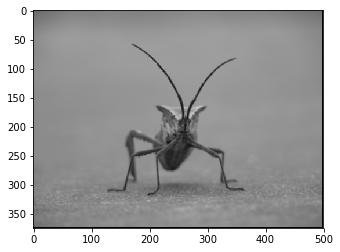

In [4]:
# First filter
filter1 = image_filter(img)
plt.imshow(filter1);

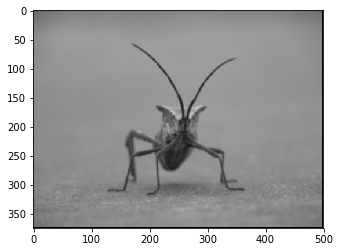

In [5]:
# Second filter
filter2 = image_filter(filter1)
plt.imshow(filter2);

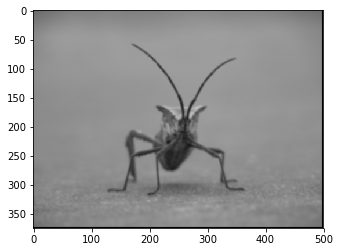

In [6]:
# Third filter
filter3 = image_filter(filter2)
plt.imshow(filter3);

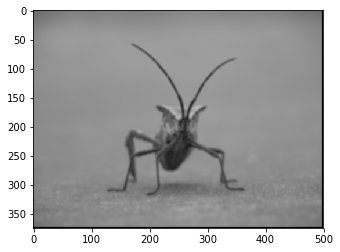

In [7]:
# Fourth filter
filter4 = image_filter(filter3)
plt.imshow(filter4);

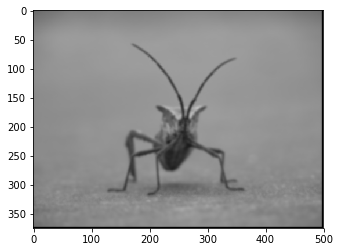

In [8]:
# Fifth filter
filter5 = image_filter(filter4)
plt.imshow(filter5);